# Setup and Load Data 

In [1]:
!pip install tensorflow tensorflow-gpu apencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


ERROR: Could not find a version that satisfies the requirement apencv-python (from versions: none)
ERROR: No matching distribution found for apencv-python

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list 

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
alabaster                     0.7.12
altair                        5.0.1
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautif


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [248]:
import tensorflow as tf
import os

In [249]:
os.path.join('data','happy')#open any file 

'data\\happy'

In [250]:
#os.listdir('Desktop') #list every thing in taht particular folder 

In [424]:
#take all gpus 
#Avoid OOM errors by setting GPU Memory consumption growth 
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: #limiting the memory growth
    tf.config.experimental.set_memory_growth(gpu,True)

In [425]:
##Removing dodgy images 
import cv2 
import imghdr


In [426]:
data_dir=r"C:\Users\yluja\Desktop\dataa"
data_dir

'C:\\Users\\yluja\\Desktop\\dataa'

In [427]:
os.listdir(data_dir) #folders inside that file

['happy', 'sad']

In [428]:
#check every single image in folders 
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile-svg_.png',
 '26176167-friendship-and-happy-people-concept-two-smiling-gir.jpg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '360_F_261529596_YZWJaMnYFSCM0FSCrxs71o6RrZ9MpP4D.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '53654466-people-freedom-happiness-and-teenage-concept-group-.jpg',
 '8073361_habitonhappypeople_jpeg788f133b16a67222bdb2189ac7856.jpeg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809a.png',
 '8cEbMbgxi.jpg',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'ACg8ocIKNmw0KhouXhVEiWJrOdfi1Qc9vMEO0ji_GxtVOY_fb_A-s128-b16.png',
 'ACg8ocIKNmw0KhouXhVEiWJrOdfi1Qc9vMEO0ji_GxtVOY_fb_A.jpeg',
 'A_Sep20_14_1189155141.jpg',
 'cartoon-happy-people-vector-217043.jpg',
 'compassion.jpg',
 'e6c8d72d91141c6659b6cff32c3462a6.jpg',
 'f2d07d65-96d6-44a3-b823-8fe4960

In [429]:
image_exts=['jpeg','jpg','bmp','png']

In [430]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):#data dir data image class happy or sad
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path) #delete not valid imgs
        except Exception as e:
                print('Issue with image {}'.format(image_path))

In [431]:
#for example we had this 
img=cv2.imread(os.path.join(data_dir,'happy','images (16).JPEG'))
img.shape #three channels 3 mean its colored img

(159, 318, 3)

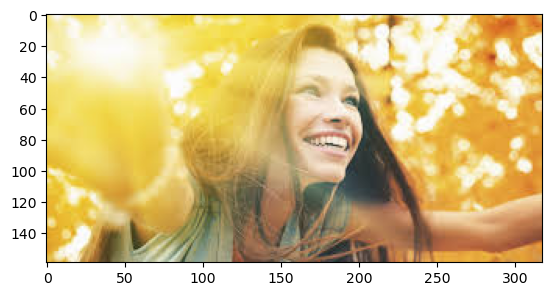

In [432]:
import matplotlib.pyplot as plt 
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));

In [433]:
#Load Data
data=tf.keras.utils.image_dataset_from_directory(data_dir) #buliding pipeline 

Found 167 files belonging to 2 classes.


In [434]:
data_iterator = data.as_numpy_iterator() #access to pipelines

In [435]:
#Get another batch from the data
batch = data_iterator.next()
len(batch)

2

In [436]:
batch[0].shape #imges 

(32, 256, 256, 3)

In [437]:
#Class 1=sad 
#Class 0=happy
batch[1]       #labels

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0])

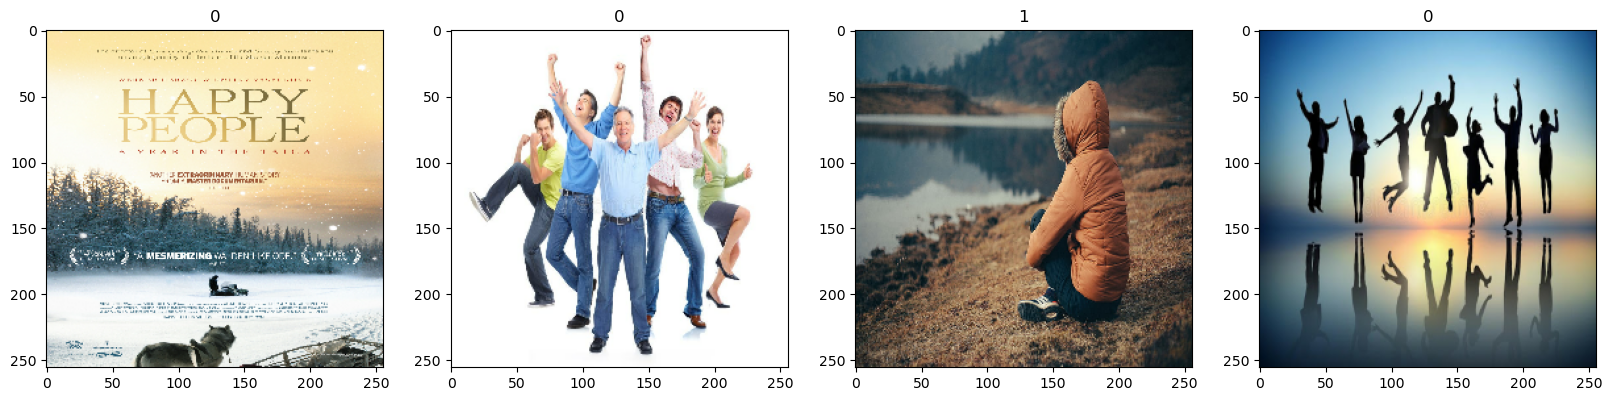

In [439]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx]) 
# 1 flag assigned to sad 0 flag to happy

# Preprocessing Data 

In [440]:
batch[0].min() ,batch[0].max()  #values bet 0 and 255 

(0.0, 255.0)

In [441]:
#scale them to become bet 0 and 1
scaled=batch[0]/255

In [442]:
scaled.min(),scaled.max()

(0.0, 1.0)

In [443]:
data=data.map(lambda x,y:(x/255,y))

In [444]:
scaled_iterator=data.as_numpy_iterator()

In [445]:
batch = scaled_iterator.next()

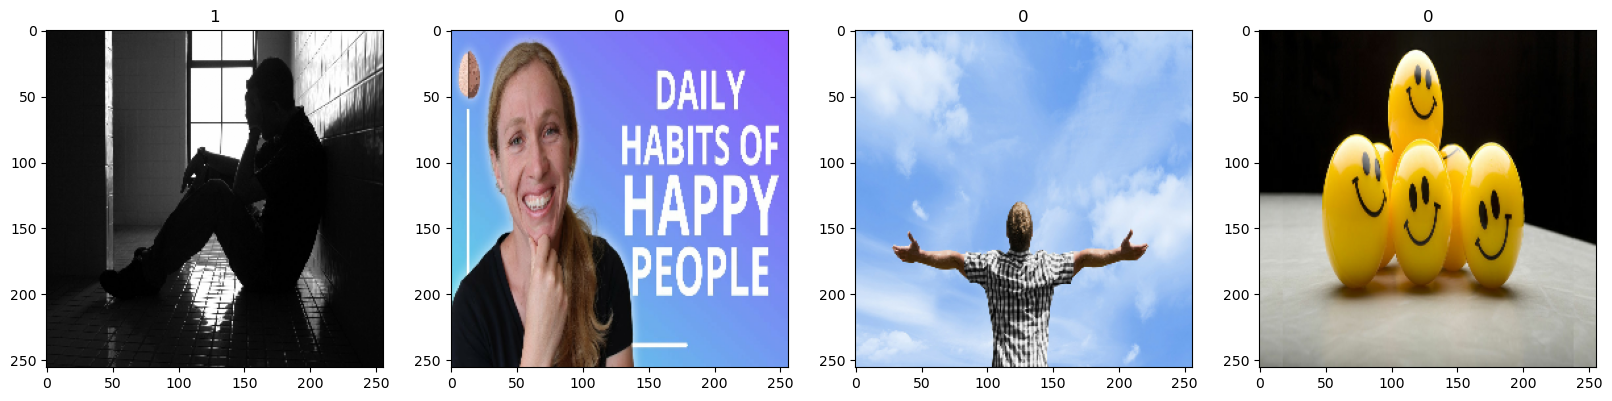

In [447]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx]) 
# now our images bet 0 and 1

# Split Data 

In [453]:
len(data) #num of batches

6

In [455]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [456]:
train_size+val_size+test_size

6

In [457]:
train = data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

# Deep Model

In [277]:
#Bulit Deep Learning model

In [458]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [459]:
model=Sequential()

In [460]:
#add layers
#3 conutional layers 
#1 flatten layer 
#2 dense layer                                         hight weight channels 
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D()) #16 filters size 3*3 stride 1 
# max pool take max value of pool activations  
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #sigmoid 0 or 1 which is our classes 

In [461]:
#optimizer 
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
#The optimizer is a method used to update the weights in the model during training. In this case, the Adam optimizer is being used. Adam (short for Adaptive Moment Estimation) is a popular optimization algorithm that adapts the learning rates of each parameter individually.
#Loss Function: tf.losses.BinaryCrossentropy()
#The loss function is a measure of how well the model is performing. For binary classification problems (where there are two classes), binary crossentropy is a common choice. It measures the difference between the true labels and the predicted probabilities.
#Metrics: ['accuracy']

#During training, it's useful to monitor certain metrics to assess the model's performance. Here, the accuracy metric is specified, which measures the proportion of correctly classified samples.

In [462]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 16)       

In [283]:
from PIL import Image
image = Image.open('nnnn.png')
image.show()

# train

In [463]:
logdir=r"C:\Users\yluja\Desktop\logs"

In [464]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
#store informations to TensorBoard so we can open them later

In [465]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback] ) #history ->take all the information from train and validation data to use it in plot
#When you run deep learning models on a GPU, the training process can be significantly accelerated compared to running on a CPU

Epoch 1/20
3/3 [==============================] - 11s 2s/step - loss: 3.5063 - accuracy: 0.4062 - val_loss: 0.6443 - val_accuracy: 0.5781
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 0.6931 - accuracy: 0.4896 - val_loss: 0.6477 - val_accuracy: 0.6094
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.6649 - accuracy: 0.5625 - val_loss: 0.6555 - val_accuracy: 0.6250
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 0.6762 - accuracy: 0.5417 - val_loss: 0.6834 - val_accuracy: 0.5156
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 0.6730 - accuracy: 0.5312 - val_loss: 0.6616 - val_accuracy: 0.6719
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 0.6557 - accuracy: 0.6562 - val_loss: 0.6466 - val_accuracy: 0.5781
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.6869 - accuracy: 0.5208 - val_loss: 0.6618 - val_accuracy: 0.4844
Epoch 8/20
3/3 [========================

In [466]:
hist=model.fit(train,epochs=50,validation_data=val,callbacks=[tensorboard_callback] )

Epoch 1/50
3/3 [==============================] - 7s 1s/step - loss: 0.3862 - accuracy: 0.8021 - val_loss: 0.3193 - val_accuracy: 0.8594
Epoch 2/50
3/3 [==============================] - 4s 1s/step - loss: 0.2871 - accuracy: 0.9062 - val_loss: 0.2452 - val_accuracy: 0.9375
Epoch 3/50
3/3 [==============================] - 4s 1s/step - loss: 0.2944 - accuracy: 0.8646 - val_loss: 0.3154 - val_accuracy: 0.8125
Epoch 4/50
3/3 [==============================] - 4s 1s/step - loss: 0.3090 - accuracy: 0.8438 - val_loss: 0.2885 - val_accuracy: 0.8750
Epoch 5/50
3/3 [==============================] - 4s 1s/step - loss: 0.2334 - accuracy: 0.9479 - val_loss: 0.2283 - val_accuracy: 0.9531
Epoch 6/50
3/3 [==============================] - 4s 1s/step - loss: 0.2079 - accuracy: 0.9375 - val_loss: 0.2180 - val_accuracy: 0.9375
Epoch 7/50
3/3 [==============================] - 4s 1s/step - loss: 0.2534 - accuracy: 0.9062 - val_loss: 0.2248 - val_accuracy: 0.9062
Epoch 8/50
3/3 [=========================

ways to increase the accuracy 
- Model Complexity
- Learning Rate
- Data Augmentation
- Regularization
- Different Architectures
- Hyperparameter Tuning
- Evaluate Data Quality
- Class Imbalance
- Ensemble Learning
- increse number of epochs but it might lead to overfitting

In [467]:
import pandas as pd
dict=hist.history
pd.DataFrame.from_dict(dict) #inforamtion

,loss,accuracy,val_loss,val_accuracy
0,0.386233,0.802083,0.319314,0.859375
1,0.287116,0.906250,0.245247,0.937500
2,0.294405,0.864583,0.315388,0.812500
3,0.309007,0.843750,0.288492,0.875000
4,0.233359,0.947917,0.228310,0.953125
5,0.207935,0.937500,0.217971,0.937500
6,0.253360,0.906250,0.224838,0.906250
7,0.229131,0.916667,0.148992,0.953125
8,0.241866,0.927083,0.189510,0.921875
9,0.119110,0.979167,0.184235,0.968750


# plot performace

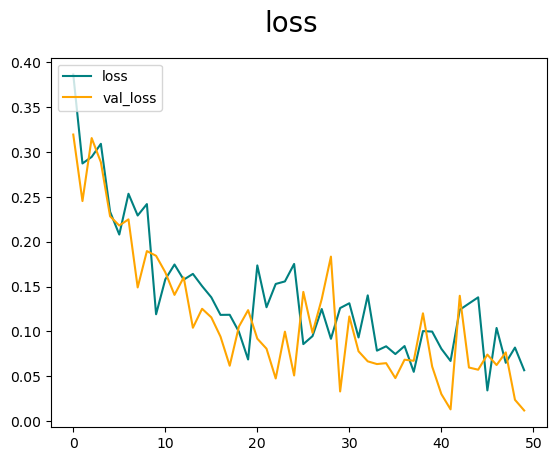

In [468]:
#visulize the loss
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc='upper left'); #the lose is going down 
# if going down then up it might mean overfitting

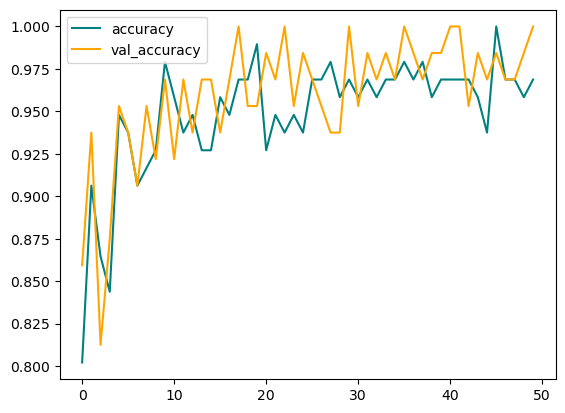

In [469]:
#visulize the accuracy
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left');

# Evalute performance

In [470]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy 
pre=Precision()
recall=Recall()
acc=BinaryAccuracy()

In [471]:
#iterate through each batches and see there evalutions metrics
for batch in test.as_numpy_iterator():
    x,y =batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    recall.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 128ms/step


In [472]:
print(f'Precision {pre.result().numpy()},{recall.result().numpy()},{acc.result().numpy()} ')
#high values its mean its performing better

Precision 1.0,0.8333333134651184,0.8571428656578064 


In [209]:
#Test

In [294]:
import cv2

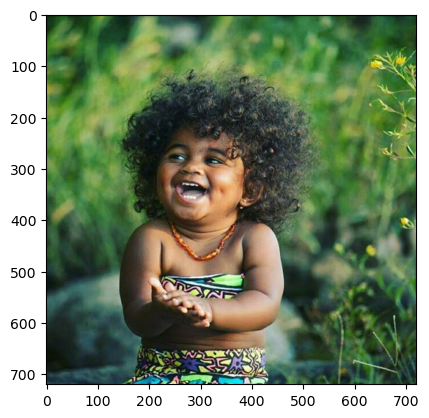

In [491]:
img=cv2.imread('8e06de1bf2171da2312b6de61c61e4bc.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));

In [492]:
img_happy=cv2.imread('8e06de1bf2171da2312b6de61c61e4bc.jpg')
resize = tf.image.resize(img_happy, (256, 256))/255  # Assuming normalization to [0, 1]
yhat = model.predict(np.expand_dims(resize, 0))

1/1 [==============================] - 0s 21ms/step


In [493]:
yhat #0 which is happy 

array([[0.08736078]], dtype=float32)

In [494]:
if yhat >0.5:
    print(f'predicted class is sad')
else:
    print('predicted class is happy')

predicted class is happy


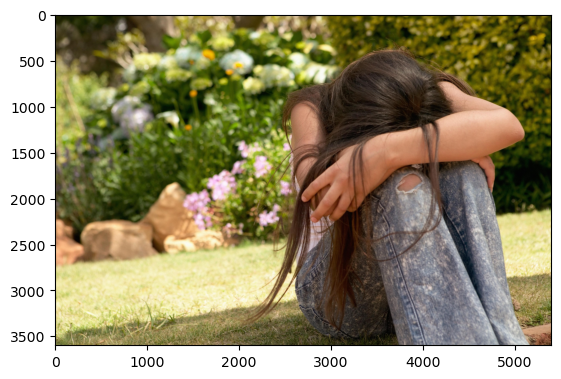

In [499]:
img=cv2.imread('42-15542443.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));

In [500]:
img_sad=cv2.imread('1-sad-vahidreza-saeinasab.jpg')
resize = tf.image.resize(img_sad, (256, 256))/255# Assuming normalization to [0, 1]
yhat = model.predict(np.expand_dims(resize, 0))

1/1 [==============================] - 0s 21ms/step


In [501]:
yhat#1 which is sad

array([[0.9279359]], dtype=float32)

In [502]:
if yhat >0.5:
    print(f'predicted class is sad')
else:
    print('predicted class is happy')

predicted class is sad


# Save the model

In [503]:
from tensorflow.keras.models import load_model 

In [504]:
model.save(os.path.join(r"C:\Users\yluja\Downloads\models",'happysadmodel.h5'))

C:\Users\yluja\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [505]:
new_model =load_model(os.path.join(r"C:\Users\yluja\Downloads\models",'happysadmodel.h5'))

In [506]:
yhat_new=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 73ms/step


In [508]:
if yhat_new >0.5:
    print('sad')
else:
    print('happy')

sad
